In [2]:
import matplotlib.pyplot as plt
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image



In [3]:
app = FaceAnalysis(name='buffalo_l',  providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640,640))


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

In [4]:
swapper = insightface.model_zoo.get_model('../models/inswapper_128.onnx', download=False, download_zip=False)

/opt/conda/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [7]:
# main_img: File Path to AI generated background image (with one person)
# face_image: File path to mugshot/celebrity face
def swapswap(main_img, face_image, show_steps=False, write=""):
    img2 = cv2.imread(main_img)
    
    if show_steps:
        plt.imshow(img2[:,:,::-1])
        plt.title('Background AI image')
        plt.show()

    img_face = cv2.imread(face_image)
    if show_steps:
        plt.imshow(img_face[:,:,::-1])
        plt.title('Original image')
        plt.show()

    face_out = app.get(img2)[0]

    face_in = app.get(img_face)[0]

    # bbox = face_out['bbox']
    # bbox = [int(b) for b in bbox]
    
    # if show_steps:
    #     plt.imshow(img2[bbox[1]:bbox[3],bbox[0]:bbox[2], ::-1])
    #     plt.axis('off')
    #     plt.show()

    # bbox = face_in['bbox']
    # bbox = [int(b) for b in bbox]
    # if show_steps:
    #     plt.imshow(img_face[bbox[1]:bbox[3],bbox[0]:bbox[2], ::-1])
    #     plt.axis('off')
    #     plt.show()

    res2 = img2.copy()

    res2 = swapper.get(res2, face_out, face_in, paste_back=True)
    
    if write != "":
        plt.imsave(write, res2[:,:,::-1])

    return res2

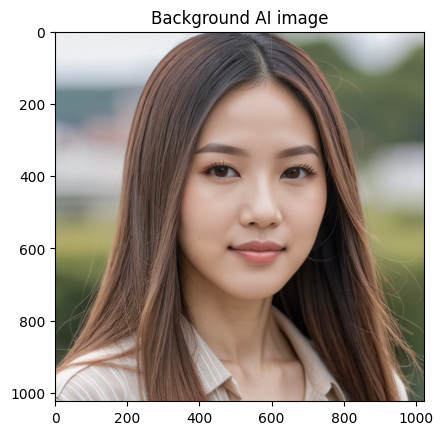

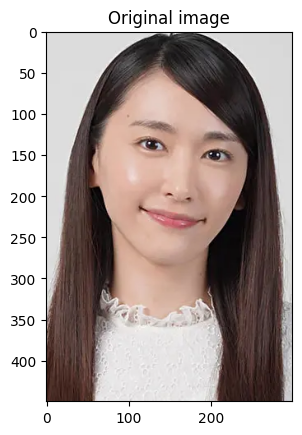

/opt/conda/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


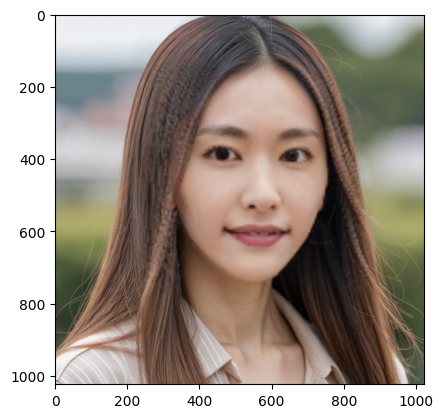

In [55]:
idx, good = 6, True

if not good:
    res2 = swapswap(f'/home/apramey/FaceAugment/generated_images/generated_ya/generated_ya2_{idx}.png', '/home/apramey/FaceAugment/generated_images/Other_Source/ya_source2.png', show_steps=True)
else:
    res2 = swapswap(f'/home/apramey/FaceAugment/generated_images/generated_ya/generated_ya2_{idx}.png', '/home/apramey/FaceAugment/generated_images/Other_Source/ya_source2.png', show_steps=True, write=f"/home/apramey/FaceAugment/generated_images/swapped_ya/swapped_ya2_{idx}.png"
)
plt.imshow(res2[:,:,::-1])
plt.show()